In [14]:
from strategy.financialpredict import FinancialPredict
from strategy.speculation import Speculation
from strategy.competition import Competition
from database.market import Market
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm

In [8]:
market = Market()

In [4]:
start = datetime(2016,1,1)
end = datetime(2022,1,1)

In [5]:
fp = FinancialPredict(start,end,modeling_params={"score_requirement":70,"categories":4,"model_training_year":4},
                    trading_params={"requirement":10,"value":True})
spec = Speculation(start,end,modeling_params={"number_of_training_weeks":14,"categories":4
                                  ,"model_training_year":1,"score_requirement":70},
              trading_params={"score_requirement":70,"requirement":5,"value":True})
comp = Competition(start,end,modeling_params={"categories":4,"model_training_year":1,"score_requirement":70},
                trading_params={"score_requirement":70,"requirement":5,"value":True})

In [9]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()

In [15]:
sim.columns

Index(['date', 'ticker', 'adjclose', 'categories', 'xgb_prediction',
       'xgb_score', 'cat_prediction', 'cat_score', 'prediction', 'score',
       'delta', 'score_requirement', 'model_training_year', 'light_prediction',
       'light_score', 'skl_prediction', 'skl_score'],
      dtype='object')

In [16]:
fp.name

'financial_predict'

In [40]:
analysis = []
for strat in tqdm([fp,spec,comp]):
    sim = strat.create_sim()
    sim["year"] = [x.year for x in sim["date"]]
    sim["quarter"] = [x.quarter for x in sim["date"]]
    sim["week"] = [x.week for x in sim["date"]]
    for ticker in tqdm(sp5["Symbol"].unique()):
        try:
            ticker_example = sim[sim["ticker"]==ticker]
            ticker_example.sort_values("date",inplace=True)
            if strat.name == "financial_predict":
                data = ticker_example.groupby(["year","quarter"]).mean().reset_index()
            else:
                data = ticker_example.groupby(["year","week"]).mean().reset_index()
            nan_percent = len([x for x in data["prediction"].isna() if x]) / data.index.size
            conf = data["score"].mean()
            data["check"] = data["prediction"].shift(1)
            vhat = data[["check","adjclose"]].dropna()
            mape = mean_absolute_percentage_error(vhat["check"],vhat["adjclose"])
            analysis.append({"strat":strat.name,"ticker":ticker,"mape":mape,"r2":conf,"nan_percent":nan_percent})
        except Exception as e:
            print(strat.name,ticker,str(e))

  5%|█████▏                                                                                                             | 23/505 [00:06<02:07,  3.77it/s]

financial_predict GOOG division by zero



 13%|██████████████▊                                                                                                    | 65/505 [00:17<01:56,  3.78it/s]

financial_predict BRK.B division by zero



 16%|█████████████████▉                                                                                                 | 79/505 [00:21<01:51,  3.81it/s]

financial_predict BF.B division by zero



 18%|████████████████████▎                                                                                              | 89/505 [00:23<01:50,  3.76it/s]

financial_predict CARR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 29%|█████████████████████████████████▍                                                                                | 148/505 [00:39<01:33,  3.83it/s]

financial_predict DISCK division by zero



 38%|███████████████████████████████████████████▊                                                                      | 194/505 [00:51<01:22,  3.79it/s]

financial_predict FRC division by zero



 40%|█████████████████████████████████████████████▊                                                                    | 203/505 [00:53<01:19,  3.80it/s]

financial_predict FOX division by zero



 61%|█████████████████████████████████████████████████████████████████████▎                                            | 307/505 [01:21<00:52,  3.80it/s]


 66%|███████████████████████████████████████████████████████████████████████████▌                                      | 335/505 [01:28<00:44,  3.79it/s]

financial_predict NWS division by zero



 71%|████████████████████████████████████████████████████████████████████████████████▌                                 | 357/505 [01:34<00:38,  3.81it/s]

financial_predict OGN division by zero



 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 459/505 [02:01<00:12,  3.75it/s]

financial_predict UA division by zero



 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 475/505 [02:06<00:07,  3.76it/s]

financial_predict VTRS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 501/505 [02:12<00:01,  3.80it/s]

financial_predict YUM division by zero



 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 502/505 [02:13<00:00,  3.82it/s]

financial_predict ZBRA division by zero



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 503/505 [02:13<00:00,  3.79it/s]

financial_predict ZBH division by zero



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 504/505 [02:13<00:00,  3.81it/s]

financial_predict ZION division by zero



 33%|███████████████████████████████████████                                                                              | 1/3 [02:41<05:23, 162.00s/it]

financial_predict ZTS division by zero



  5%|█████▏                                                                                                             | 23/505 [00:02<00:45, 10.62it/s]


speculation GOOG division by zero


 13%|██████████████▊                                                                                                    | 65/505 [00:06<00:41, 10.58it/s]


speculation BRK.B division by zero


 16%|█████████████████▉                                                                                                 | 79/505 [00:07<00:40, 10.60it/s]


speculation BF.B division by zero


 30%|█████████████████████████████████▋                                                                                | 149/505 [00:14<00:33, 10.65it/s]

speculation DISCK division by zero



 39%|████████████████████████████████████████████                                                                      | 195/505 [00:18<00:29, 10.59it/s]

speculation FRC division by zero



 40%|█████████████████████████████████████████████▊                                                                    | 203/505 [00:19<00:28, 10.66it/s]


speculation FOX division by zero


 66%|███████████████████████████████████████████████████████████████████████████▌                                      | 335/505 [00:31<00:16, 10.62it/s]


speculation NWS division by zero


 71%|█████████████████████████████████████████████████████████████████████████████████                                 | 359/505 [00:33<00:13, 10.65it/s]

speculation OGN division by zero



 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 459/505 [00:43<00:04, 10.63it/s]


speculation UA division by zero


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 475/505 [00:44<00:02, 10.58it/s]


speculation VTRS division by zero


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 501/505 [00:47<00:00, 10.61it/s]


speculation YUM division by zero
speculation ZBRA division by zero
speculation ZBH division by zero


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 2/3 [03:41<01:41, 101.56s/it]

speculation ZION division by zero
speculation ZTS division by zero



  1%|█▏                                                                                                                  | 5/505 [00:00<01:15,  6.61it/s]

competition ABMD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  1%|█▌                                                                                                                  | 7/505 [00:01<01:15,  6.62it/s]

competition ATVI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ADBE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  2%|██                                                                                                                  | 9/505 [00:01<01:14,  6.63it/s]

competition AMD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition AAP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  2%|██▌                                                                                                                | 11/505 [00:01<01:14,  6.64it/s]

competition AES Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  3%|██▉                                                                                                                | 13/505 [00:01<01:13,  6.66it/s]

competition A Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  3%|███▍                                                                                                               | 15/505 [00:02<01:13,  6.63it/s]

competition AKAM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ALK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  4%|████                                                                                                               | 18/505 [00:02<01:13,  6.60it/s]

competition ARE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ALGN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  4%|████▌                                                                                                              | 20/505 [00:03<01:13,  6.58it/s]

competition ALLE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition LNT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  5%|█████▍                                                                                                             | 24/505 [00:03<01:12,  6.62it/s]

competition GOOG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition MO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  5%|██████▏                                                                                                            | 27/505 [00:04<01:12,  6.60it/s]

competition AMCR division by zero
competition AEE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  6%|██████▌                                                                                                            | 29/505 [00:04<01:12,  6.58it/s]

competition AAL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition AEP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  7%|███████▌                                                                                                           | 33/505 [00:05<01:11,  6.58it/s]

competition AMT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition AWK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  7%|████████▏                                                                                                          | 36/505 [00:05<01:11,  6.59it/s]

competition ABC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition AME Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  8%|████████▉                                                                                                          | 39/505 [00:05<01:11,  6.51it/s]

competition APH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ADI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  8%|█████████▎                                                                                                         | 41/505 [00:06<01:10,  6.59it/s]

competition ANSS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  9%|█████████▊                                                                                                         | 43/505 [00:06<01:10,  6.56it/s]

competition AON Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  9%|██████████▏                                                                                                        | 45/505 [00:06<01:09,  6.61it/s]

competition APA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



  9%|██████████▋                                                                                                        | 47/505 [00:07<01:09,  6.61it/s]

competition AMAT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition APTV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 10%|███████████▏                                                                                                       | 49/505 [00:07<01:08,  6.61it/s]

competition ADM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ANET Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 10%|███████████▊                                                                                                       | 52/505 [00:07<01:07,  6.68it/s]

competition AIZ Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition T Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 11%|████████████▌                                                                                                      | 55/505 [00:08<01:07,  6.68it/s]

competition ADSK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ADP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 11%|████████████▉                                                                                                      | 57/505 [00:08<01:07,  6.63it/s]

competition AZO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition AVB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 12%|█████████████▍                                                                                                     | 59/505 [00:08<01:06,  6.66it/s]

competition AVY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 12%|██████████████▎                                                                                                    | 63/505 [00:09<01:06,  6.67it/s]

competition BBWI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 13%|███████████████                                                                                                    | 66/505 [00:09<01:05,  6.67it/s]

competition BRK.B division by zero
competition BBY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 14%|███████████████▋                                                                                                   | 69/505 [00:10<01:05,  6.65it/s]

competition BIIB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 14%|████████████████▌                                                                                                  | 73/505 [00:11<01:04,  6.67it/s]

competition BKNG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition BWA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 15%|█████████████████                                                                                                  | 75/505 [00:11<01:04,  6.66it/s]

competition BXP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition BSX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 16%|█████████████████▉                                                                                                 | 79/505 [00:11<01:03,  6.72it/s]

competition BR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition BF.B division by zero



 16%|██████████████████▍                                                                                                | 81/505 [00:12<01:03,  6.69it/s]

competition CHRW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition COG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 16%|██████████████████▉                                                                                                | 83/505 [00:12<01:03,  6.69it/s]

competition CDNS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 17%|███████████████████▎                                                                                               | 85/505 [00:12<01:02,  6.68it/s]

competition CPB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 17%|███████████████████▊                                                                                               | 87/505 [00:13<01:02,  6.65it/s]

competition CAH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition KMX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 18%|████████████████████▎                                                                                              | 89/505 [00:13<01:02,  6.62it/s]

competition CCL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CARR division by zero



 18%|████████████████████▋                                                                                              | 91/505 [00:13<01:02,  6.66it/s]

competition CTLT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 18%|█████████████████████▏                                                                                             | 93/505 [00:14<01:02,  6.63it/s]

competition CBOE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CBRE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 19%|█████████████████████▊                                                                                             | 96/505 [00:14<01:01,  6.67it/s]

competition CE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 19%|██████████████████████▎                                                                                            | 98/505 [00:14<01:01,  6.59it/s]

competition CNP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CERN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 20%|██████████████████████▌                                                                                           | 100/505 [00:15<01:00,  6.65it/s]

competition CF Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CRL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 21%|███████████████████████▋                                                                                          | 105/505 [00:15<00:59,  6.67it/s]

competition CMG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 21%|████████████████████████▏                                                                                         | 107/505 [00:16<00:59,  6.68it/s]

competition CHD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 22%|████████████████████████▌                                                                                         | 109/505 [00:16<00:59,  6.65it/s]

competition CINF Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CTAS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 23%|█████████████████████████▉                                                                                        | 115/505 [00:17<00:58,  6.67it/s]

competition CLX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 23%|██████████████████████████▍                                                                                       | 117/505 [00:17<00:58,  6.64it/s]

competition CMS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 24%|██████████████████████████▊                                                                                       | 119/505 [00:17<00:57,  6.69it/s]

competition CTSH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 24%|███████████████████████████▊                                                                                      | 123/505 [00:18<00:57,  6.68it/s]

competition CAG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 25%|████████████████████████████▏                                                                                     | 125/505 [00:18<00:57,  6.65it/s]

competition ED Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 25%|████████████████████████████▋                                                                                     | 127/505 [00:19<00:56,  6.65it/s]

competition COO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CPRT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 26%|█████████████████████████████                                                                                     | 129/505 [00:19<00:56,  6.64it/s]

competition GLW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CTVA division by zero



 26%|█████████████████████████████▌                                                                                    | 131/505 [00:19<00:56,  6.66it/s]

competition COST Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 26%|██████████████████████████████                                                                                    | 133/505 [00:20<00:55,  6.65it/s]

competition CSX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition CMI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 27%|██████████████████████████████▋                                                                                   | 136/505 [00:20<00:55,  6.64it/s]

competition DHI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 27%|███████████████████████████████▏                                                                                  | 138/505 [00:20<00:55,  6.64it/s]

competition DRI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition DVA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 28%|███████████████████████████████▊                                                                                  | 141/505 [00:21<00:54,  6.67it/s]

competition DAL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition XRAY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 28%|████████████████████████████████▎                                                                                 | 143/505 [00:21<00:54,  6.66it/s]

competition DVN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition DXCM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 29%|████████████████████████████████▋                                                                                 | 145/505 [00:21<00:54,  6.64it/s]

competition FANG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition DLR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 30%|█████████████████████████████████▋                                                                                | 149/505 [00:22<00:54,  6.58it/s]

competition DISCK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 30%|██████████████████████████████████                                                                                | 151/505 [00:22<00:53,  6.60it/s]

competition DG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 30%|██████████████████████████████████▊                                                                               | 154/505 [00:23<00:53,  6.61it/s]

competition DPZ Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition DOV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 31%|███████████████████████████████████▏                                                                              | 156/505 [00:23<00:53,  6.52it/s]

competition DOW division by zero
competition DTE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 31%|███████████████████████████████████▋                                                                              | 158/505 [00:23<00:52,  6.55it/s]

competition DUK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition DRE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 32%|████████████████████████████████████▌                                                                             | 162/505 [00:24<00:52,  6.59it/s]

competition EMN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 33%|█████████████████████████████████████▏                                                                            | 165/505 [00:24<00:51,  6.57it/s]

competition ECL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition EIX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 33%|█████████████████████████████████████▋                                                                            | 167/505 [00:25<00:51,  6.61it/s]

competition EW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition EA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 33%|██████████████████████████████████████▏                                                                           | 169/505 [00:25<00:50,  6.63it/s]

competition EMR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ENPH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 34%|██████████████████████████████████████▌                                                                           | 171/505 [00:25<00:50,  6.57it/s]

competition ETR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition EOG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 34%|███████████████████████████████████████                                                                           | 173/505 [00:26<00:50,  6.60it/s]

competition EFX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 35%|███████████████████████████████████████▌                                                                          | 175/505 [00:26<00:50,  6.56it/s]

competition EQR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ESS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 35%|████████████████████████████████████████▏                                                                         | 178/505 [00:26<00:49,  6.67it/s]

competition ETSY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition EVRG division by zero



 36%|████████████████████████████████████████▋                                                                         | 180/505 [00:27<00:48,  6.66it/s]

competition ES Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition RE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 36%|█████████████████████████████████████████                                                                         | 182/505 [00:27<00:48,  6.66it/s]

competition EXC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 36%|█████████████████████████████████████████▌                                                                        | 184/505 [00:27<00:48,  6.67it/s]

competition EXPD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition EXR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 37%|██████████████████████████████████████████▏                                                                       | 187/505 [00:28<00:47,  6.63it/s]

competition FFIV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 37%|██████████████████████████████████████████▋                                                                       | 189/505 [00:28<00:47,  6.63it/s]

competition FAST Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition FRT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 38%|███████████████████████████████████████████                                                                       | 191/505 [00:28<00:47,  6.63it/s]

competition FDX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 38%|███████████████████████████████████████████▊                                                                      | 194/505 [00:29<00:46,  6.65it/s]

competition FE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition FRC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 39%|████████████████████████████████████████████▏                                                                     | 196/505 [00:29<00:46,  6.64it/s]

competition FISV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition FLT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 40%|█████████████████████████████████████████████▏                                                                    | 200/505 [00:30<00:45,  6.67it/s]

competition FTNT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition FTV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 40%|█████████████████████████████████████████████▌                                                                    | 202/505 [00:30<00:45,  6.67it/s]

competition FBHS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition FOXA division by zero



 40%|██████████████████████████████████████████████                                                                    | 204/505 [00:30<00:45,  6.58it/s]

competition FOX division by zero
competition BEN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 41%|██████████████████████████████████████████████▌                                                                   | 206/505 [00:31<00:45,  6.61it/s]

competition FCX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition GPS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 41%|██████████████████████████████████████████████▉                                                                   | 208/505 [00:31<00:44,  6.66it/s]

competition GRMN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition IT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 42%|███████████████████████████████████████████████▍                                                                  | 210/505 [00:31<00:44,  6.66it/s]

competition GNRC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition GD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 42%|████████████████████████████████████████████████                                                                  | 213/505 [00:32<00:44,  6.63it/s]

competition GIS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 43%|████████████████████████████████████████████████▌                                                                 | 215/505 [00:32<00:43,  6.61it/s]

competition GPC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 43%|████████████████████████████████████████████████▉                                                                 | 217/505 [00:32<00:43,  6.62it/s]

competition GL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 44%|█████████████████████████████████████████████████▋                                                                | 220/505 [00:33<00:43,  6.61it/s]

competition GWW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition HAL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 44%|██████████████████████████████████████████████████                                                                | 222/505 [00:33<00:42,  6.65it/s]

competition HBI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 44%|██████████████████████████████████████████████████▌                                                               | 224/505 [00:33<00:43,  6.41it/s]

competition HAS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition HCA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 45%|███████████████████████████████████████████████████                                                               | 226/505 [00:34<00:43,  6.35it/s]

competition PEAK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition HSIC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 45%|███████████████████████████████████████████████████▋                                                              | 229/505 [00:34<00:42,  6.43it/s]

competition HES Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 46%|████████████████████████████████████████████████████▎                                                             | 232/505 [00:35<00:41,  6.54it/s]

competition HOLX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 47%|█████████████████████████████████████████████████████▌                                                            | 237/505 [00:35<00:42,  6.37it/s]

competition HWM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 48%|██████████████████████████████████████████████████████▋                                                           | 242/505 [00:36<00:40,  6.45it/s]

competition IEX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition IDXX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 48%|███████████████████████████████████████████████████████                                                           | 244/505 [00:36<00:39,  6.54it/s]

competition INFO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ITW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 49%|███████████████████████████████████████████████████████▌                                                          | 246/505 [00:37<00:39,  6.56it/s]

competition ILMN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition INCY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 50%|████████████████████████████████████████████████████████▉                                                         | 252/505 [00:38<00:38,  6.59it/s]

competition IP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition IPG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 50%|█████████████████████████████████████████████████████████▎                                                        | 254/505 [00:38<00:38,  6.59it/s]

competition IFF Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition INTU Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 51%|█████████████████████████████████████████████████████████▊                                                        | 256/505 [00:38<00:37,  6.61it/s]

competition ISRG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 51%|██████████████████████████████████████████████████████████▏                                                       | 258/505 [00:39<00:37,  6.59it/s]

competition IPGP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition IQV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 52%|██████████████████████████████████████████████████████████▉                                                       | 261/505 [00:39<00:37,  6.56it/s]

competition JKHY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition J Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 52%|███████████████████████████████████████████████████████████▎                                                      | 263/505 [00:39<00:36,  6.56it/s]

competition JBHT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SJM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 53%|████████████████████████████████████████████████████████████▍                                                     | 268/505 [00:40<00:35,  6.60it/s]

competition JNPR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition KSU Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 53%|████████████████████████████████████████████████████████████▉                                                     | 270/505 [00:40<00:35,  6.58it/s]

competition K Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 54%|█████████████████████████████████████████████████████████████▋                                                    | 273/505 [00:41<00:35,  6.54it/s]

competition KMB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition KIM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 55%|██████████████████████████████████████████████████████████████▎                                                   | 276/505 [00:41<00:35,  6.52it/s]

competition KLAC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 55%|██████████████████████████████████████████████████████████████▊                                                   | 278/505 [00:42<00:34,  6.52it/s]

competition KR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 56%|███████████████████████████████████████████████████████████████▍                                                  | 281/505 [00:42<00:34,  6.48it/s]

competition LRCX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition LW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 56%|███████████████████████████████████████████████████████████████▉                                                  | 283/505 [00:42<00:34,  6.45it/s]

competition LVS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition LEG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 56%|████████████████████████████████████████████████████████████████▎                                                 | 285/505 [00:43<00:34,  6.42it/s]

competition LDOS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 57%|█████████████████████████████████████████████████████████████████▏                                                | 289/505 [00:43<00:33,  6.42it/s]

competition LIN division by zero
competition LYV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 58%|█████████████████████████████████████████████████████████████████▋                                                | 291/505 [00:44<00:33,  6.47it/s]

competition LKQ Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition LMT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 58%|██████████████████████████████████████████████████████████████████▎                                               | 294/505 [00:44<00:32,  6.50it/s]

competition LOW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 59%|██████████████████████████████████████████████████████████████████▊                                               | 296/505 [00:44<00:32,  6.47it/s]

competition LYB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 59%|███████████████████████████████████████████████████████████████████▎                                              | 298/505 [00:45<00:32,  6.44it/s]

competition MRO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 59%|███████████████████████████████████████████████████████████████████▋                                              | 300/505 [00:45<00:31,  6.46it/s]

competition MKTX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition MAR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 60%|████████████████████████████████████████████████████████████████████▏                                             | 302/505 [00:45<00:31,  6.48it/s]

competition MMC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 60%|████████████████████████████████████████████████████████████████████▋                                             | 304/505 [00:46<00:30,  6.51it/s]

competition MAS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 61%|█████████████████████████████████████████████████████████████████████▎                                            | 307/505 [00:46<00:30,  6.56it/s]

competition MXIM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition MCD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 62%|██████████████████████████████████████████████████████████████████████▋                                           | 313/505 [00:47<00:29,  6.54it/s]

competition MTD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 62%|███████████████████████████████████████████████████████████████████████                                           | 315/505 [00:47<00:28,  6.60it/s]

competition MCHP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 63%|████████████████████████████████████████████████████████████████████████                                          | 319/505 [00:48<00:28,  6.61it/s]

competition MRNA division by zero
competition MHK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 64%|████████████████████████████████████████████████████████████████████████▉                                         | 323/505 [00:49<00:27,  6.58it/s]

competition MPWR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition MNST Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 64%|█████████████████████████████████████████████████████████████████████████▎                                        | 325/505 [00:49<00:27,  6.58it/s]

competition MCO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 65%|██████████████████████████████████████████████████████████████████████████                                        | 328/505 [00:49<00:26,  6.61it/s]

competition MSI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 65%|██████████████████████████████████████████████████████████████████████████▍                                       | 330/505 [00:50<00:26,  6.63it/s]

competition NDAQ Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NTAP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 66%|██████████████████████████████████████████████████████████████████████████▉                                       | 332/505 [00:50<00:26,  6.62it/s]

competition NFLX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NWL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 67%|███████████████████████████████████████████████████████████████████████████▊                                      | 336/505 [00:50<00:25,  6.61it/s]

competition NWS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 67%|████████████████████████████████████████████████████████████████████████████▎                                     | 338/505 [00:51<00:25,  6.61it/s]

competition NLSN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 67%|████████████████████████████████████████████████████████████████████████████▊                                     | 340/505 [00:51<00:25,  6.58it/s]

competition NI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NSC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 68%|█████████████████████████████████████████████████████████████████████████████▋                                    | 344/505 [00:52<00:24,  6.58it/s]

competition NLOK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 69%|██████████████████████████████████████████████████████████████████████████████                                    | 346/505 [00:52<00:24,  6.60it/s]

competition NOV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NRG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 69%|██████████████████████████████████████████████████████████████████████████████▌                                   | 348/505 [00:52<00:23,  6.60it/s]

competition NUE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NVDA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 69%|███████████████████████████████████████████████████████████████████████████████                                   | 350/505 [00:53<00:23,  6.55it/s]

competition NVR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition NXPI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 70%|███████████████████████████████████████████████████████████████████████████████▍                                  | 352/505 [00:53<00:23,  6.49it/s]

competition ORLY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 70%|███████████████████████████████████████████████████████████████████████████████▉                                  | 354/505 [00:53<00:23,  6.53it/s]

competition ODFL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition OMC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 70%|████████████████████████████████████████████████████████████████████████████████▎                                 | 356/505 [00:54<00:22,  6.52it/s]

competition OKE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 71%|████████████████████████████████████████████████████████████████████████████████▊                                 | 358/505 [00:54<00:22,  6.58it/s]

competition OGN division by zero
competition OTIS division by zero



 71%|█████████████████████████████████████████████████████████████████████████████████▎                                | 360/505 [00:54<00:21,  6.60it/s]

competition PCAR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PKG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 72%|█████████████████████████████████████████████████████████████████████████████████▋                                | 362/505 [00:54<00:21,  6.62it/s]

competition PH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PAYX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 72%|██████████████████████████████████████████████████████████████████████████████████▏                               | 364/505 [00:55<00:21,  6.58it/s]

competition PAYC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 72%|██████████████████████████████████████████████████████████████████████████████████▌                               | 366/505 [00:55<00:21,  6.55it/s]

competition PENN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PNR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 73%|███████████████████████████████████████████████████████████████████████████████████                               | 368/505 [00:55<00:20,  6.54it/s]

competition PBCT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 73%|███████████████████████████████████████████████████████████████████████████████████▌                              | 370/505 [00:56<00:20,  6.58it/s]

competition PKI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 74%|████████████████████████████████████████████████████████████████████████████████████▏                             | 373/505 [00:56<00:20,  6.53it/s]

competition PM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PSX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 74%|████████████████████████████████████████████████████████████████████████████████████▋                             | 375/505 [00:56<00:20,  6.48it/s]

competition PNW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PXD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 75%|█████████████████████████████████████████████████████████████████████████████████████▎                            | 378/505 [00:57<00:19,  6.54it/s]

competition POOL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PPG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 75%|█████████████████████████████████████████████████████████████████████████████████████▊                            | 380/505 [00:57<00:19,  6.55it/s]

competition PPL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 76%|██████████████████████████████████████████████████████████████████████████████████████▍                           | 383/505 [00:58<00:18,  6.58it/s]

competition PGR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PLD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 76%|███████████████████████████████████████████████████████████████████████████████████████▏                          | 386/505 [00:58<00:18,  6.59it/s]

competition PTC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PEG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 77%|███████████████████████████████████████████████████████████████████████████████████████▌                          | 388/505 [00:58<00:17,  6.56it/s]

competition PSA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition PHM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 77%|████████████████████████████████████████████████████████████████████████████████████████                          | 390/505 [00:59<00:17,  6.59it/s]

competition PVH Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 78%|████████████████████████████████████████████████████████████████████████████████████████▉                         | 394/505 [00:59<00:16,  6.60it/s]

competition DGX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                        | 396/505 [01:00<00:16,  6.58it/s]

competition RJF Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                        | 398/505 [01:00<00:16,  6.58it/s]

competition O Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition REG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 80%|██████████████████████████████████████████████████████████████████████████████████████████▉                       | 403/505 [01:01<00:15,  6.54it/s]

competition RMD Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition RHI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 80%|███████████████████████████████████████████████████████████████████████████████████████████▍                      | 405/505 [01:01<00:15,  6.49it/s]

competition ROK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ROL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 81%|███████████████████████████████████████████████████████████████████████████████████████████▉                      | 407/505 [01:01<00:15,  6.45it/s]

competition ROP Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ROST Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 81%|████████████████████████████████████████████████████████████████████████████████████████████▎                     | 409/505 [01:02<00:14,  6.47it/s]

competition RCL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SPGI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 82%|█████████████████████████████████████████████████████████████████████████████████████████████                     | 412/505 [01:02<00:14,  6.47it/s]

competition SBAC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 82%|█████████████████████████████████████████████████████████████████████████████████████████████▋                    | 415/505 [01:03<00:13,  6.50it/s]

competition SEE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SRE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                   | 417/505 [01:03<00:13,  6.52it/s]

competition NOW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SHW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 83%|██████████████████████████████████████████████████████████████████████████████████████████████▊                   | 420/505 [01:03<00:13,  6.52it/s]

competition SWKS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SNA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 84%|███████████████████████████████████████████████████████████████████████████████████████████████▎                  | 422/505 [01:04<00:12,  6.52it/s]

competition SO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition LUV Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 84%|███████████████████████████████████████████████████████████████████████████████████████████████▉                  | 425/505 [01:04<00:12,  6.50it/s]

competition SBUX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 85%|████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 427/505 [01:04<00:11,  6.54it/s]

competition STE Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SYK Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 85%|████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 429/505 [01:05<00:11,  6.51it/s]

competition SIVB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                | 431/505 [01:05<00:11,  6.53it/s]

competition SNPS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition SYY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                | 434/505 [01:05<00:10,  6.59it/s]

competition TROW Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TTWO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍               | 436/505 [01:06<00:10,  6.60it/s]

competition TPR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TGT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▉               | 438/505 [01:06<00:10,  6.61it/s]

competition TEL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TDY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▎              | 440/505 [01:06<00:09,  6.59it/s]

competition TFX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TER Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊              | 442/505 [01:07<00:09,  6.57it/s]

competition TSLA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TXN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 444/505 [01:07<00:09,  6.56it/s]

competition TXT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TMO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 446/505 [01:07<00:09,  6.54it/s]

competition TJX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TSCO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 448/505 [01:08<00:08,  6.59it/s]

competition TT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TDG Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 451/505 [01:08<00:08,  6.57it/s]

competition TRMB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 453/505 [01:08<00:08,  6.37it/s]

competition TWTR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition TYL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 456/505 [01:09<00:07,  6.53it/s]

competition UDR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition ULTA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 460/505 [01:09<00:06,  6.59it/s]

competition UA Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 462/505 [01:10<00:06,  6.61it/s]

competition UAL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 465/505 [01:10<00:06,  6.57it/s]

competition URI Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 468/505 [01:11<00:05,  6.50it/s]

competition VLO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition VTR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████        | 470/505 [01:11<00:05,  6.59it/s]

competition VRSN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 473/505 [01:11<00:04,  6.53it/s]

competition VRTX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition VFC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 476/505 [01:12<00:04,  6.65it/s]

competition VTRS division by zero



 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 478/505 [01:12<00:04,  6.62it/s]

competition VNO Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition VMC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 480/505 [01:12<00:03,  6.61it/s]

competition WRB Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 484/505 [01:13<00:03,  6.60it/s]

competition DIS Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition WM Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 486/505 [01:13<00:02,  6.58it/s]

competition WAT Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition WEC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 489/505 [01:14<00:02,  6.60it/s]

competition WELL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition WST Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 491/505 [01:14<00:02,  6.58it/s]

competition WDC Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition WU Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 494/505 [01:15<00:01,  6.51it/s]

competition WY Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition WHR Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 498/505 [01:15<00:01,  6.59it/s]

competition WYNN Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition XEL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 500/505 [01:15<00:00,  6.59it/s]

competition XLNX Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
competition XYL Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.



 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 502/505 [01:16<00:00,  6.63it/s]

competition YUM division by zero
competition ZBRA division by zero



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 504/505 [01:16<00:00,  6.69it/s]

competition ZBH division by zero
competition ZION division by zero



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [05:13<00:00, 104.40s/it]

competition ZTS division by zero


In [41]:
a = pd.DataFrame(analysis)

  0%|                                                                                                                              | 0/1 [00:00<?, ?it/s]

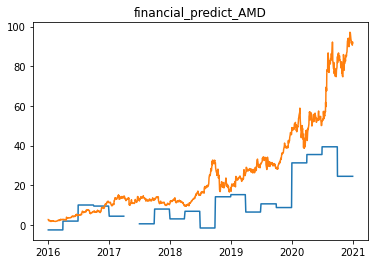

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:28<00:00, 28.10s/it]


In [47]:
for ticker in tqdm(suss["ticker"].unique()[:1]):
    strat = fp
    sim = strat.create_sim()
    sim["year"] = [x.year for x in sim["date"]]
    sim["quarter"] = [x.quarter for x in sim["date"]]
    sim["week"] = [x.week for x in sim["date"]]
    ticker_example = sim[sim["ticker"]==ticker].groupby("date").mean().reset_index()
    ticker_example.sort_values("date",inplace=True)
    plt.plot(ticker_example["date"],ticker_example["prediction"])
    plt.plot(ticker_example["date"],ticker_example["adjclose"])
    plt.title(f'{strat.name}_{ticker}')
    plt.show()

In [45]:
ticker_example[["date","prediction"]]

,date,prediction
8600,2016-01-04,NaN
44406,2016-01-04,NaN
65512,2016-01-04,-2.435750
65513,2016-01-05,-2.435750
8601,2016-01-05,NaN
...,...,...
1790772,2020-12-30,22.983037
1851860,2020-12-30,43.622660
1790773,2020-12-31,22.983037
1829333,2020-12-31,7.091983


  0%|                                                                                                                             | 0/48 [00:00<?, ?it/s]

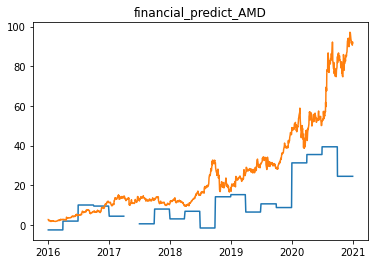

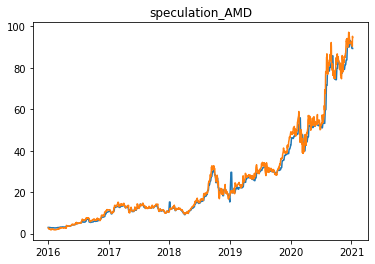

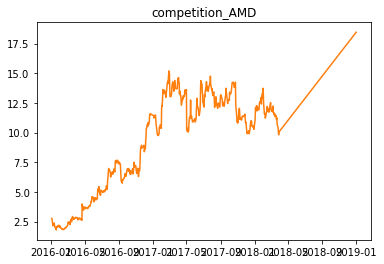

  2%|██▍                                                                                                                  | 1/48 [00:55<43:14, 55.21s/it]

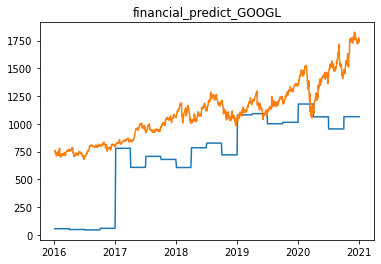

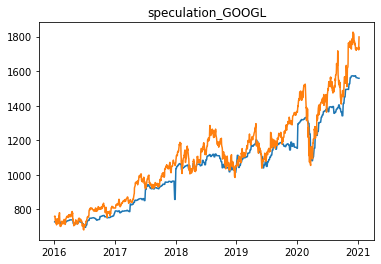

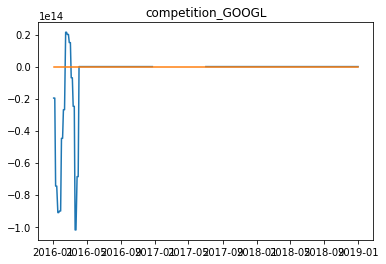

  4%|████▉                                                                                                                | 2/48 [01:50<42:12, 55.06s/it]

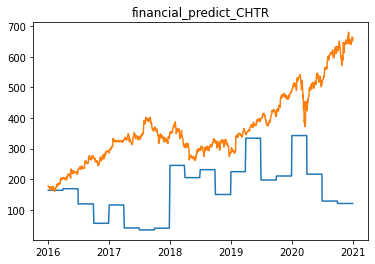

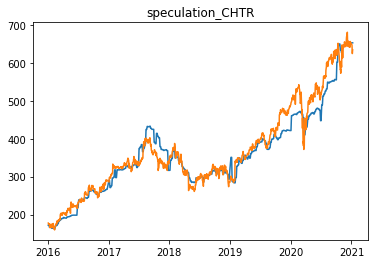

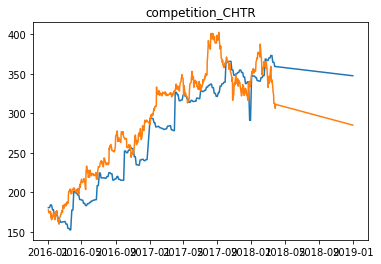

  6%|███████▎                                                                                                             | 3/48 [02:45<41:17, 55.06s/it]

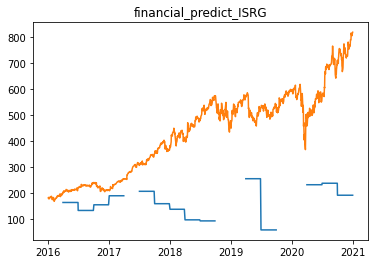

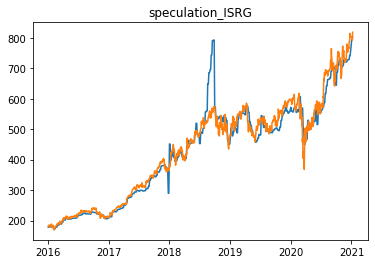

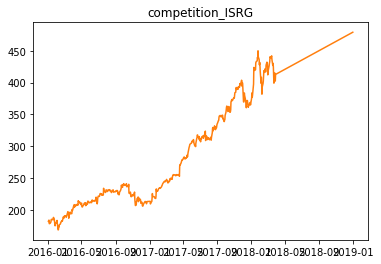

  8%|█████████▊                                                                                                           | 4/48 [03:40<40:23, 55.08s/it]

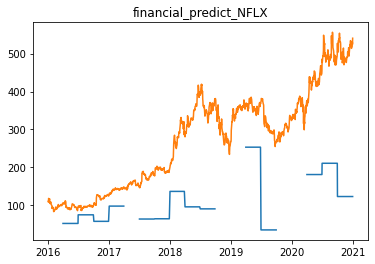

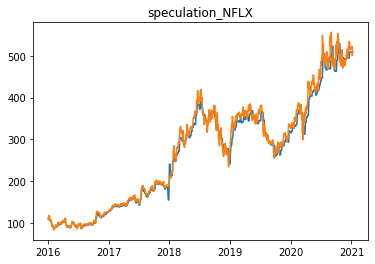

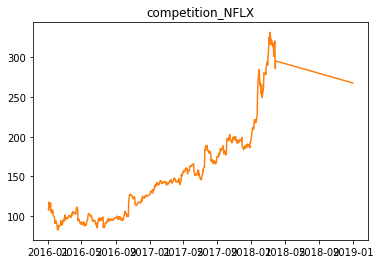

 10%|████████████▏                                                                                                        | 5/48 [04:39<40:26, 56.42s/it]

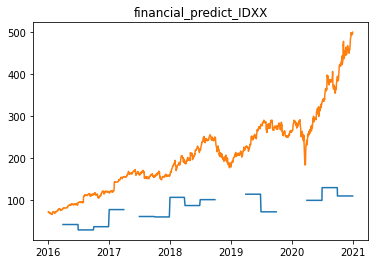

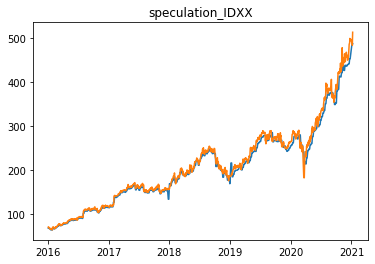

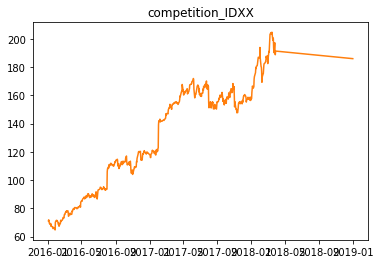

 12%|██████████████▋                                                                                                      | 6/48 [05:34<39:11, 55.99s/it]

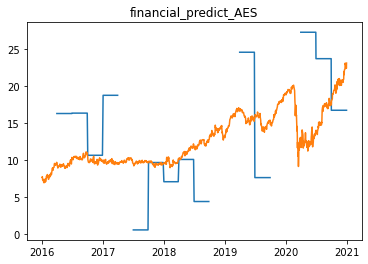

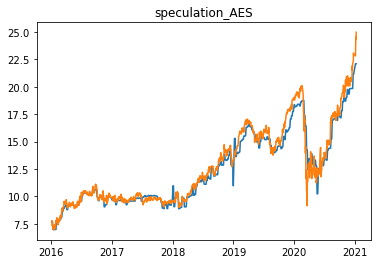

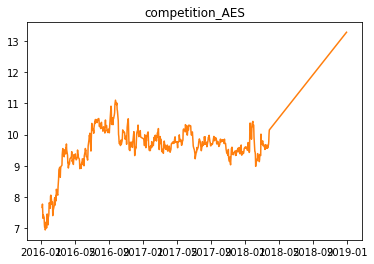

 15%|█████████████████                                                                                                    | 7/48 [06:28<37:56, 55.53s/it]

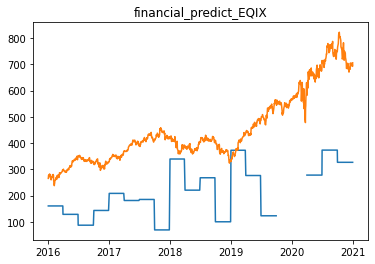

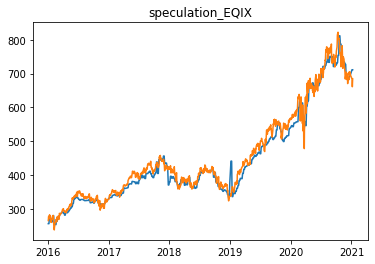

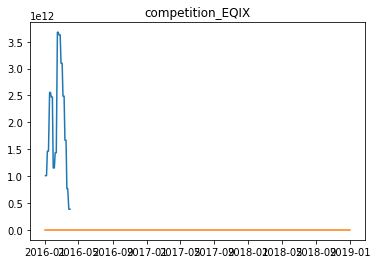

 17%|███████████████████▌                                                                                                 | 8/48 [07:23<36:44, 55.10s/it]

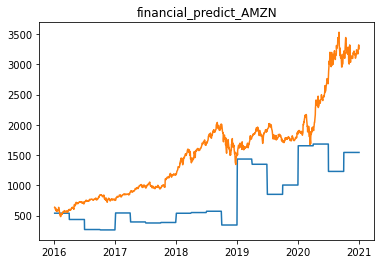

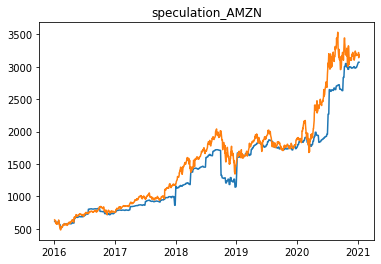

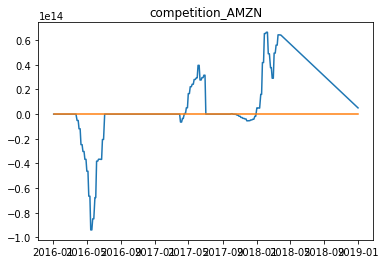

 19%|█████████████████████▉                                                                                               | 9/48 [08:17<35:39, 54.87s/it]

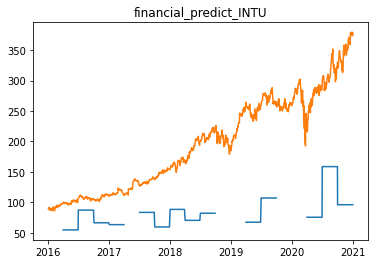

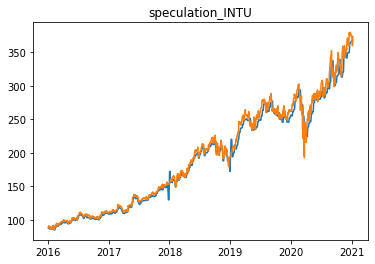

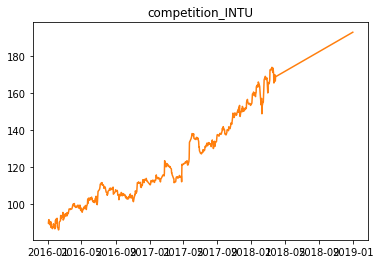

 21%|████████████████████████▏                                                                                           | 10/48 [09:12<34:43, 54.82s/it]

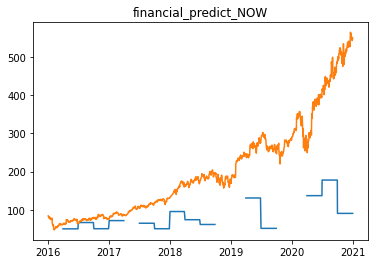

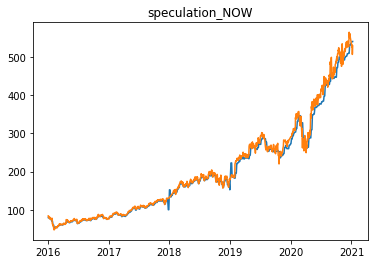

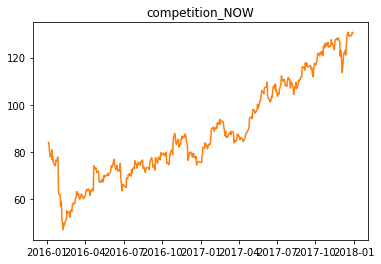

 23%|██████████████████████████▌                                                                                         | 11/48 [10:06<33:42, 54.65s/it]

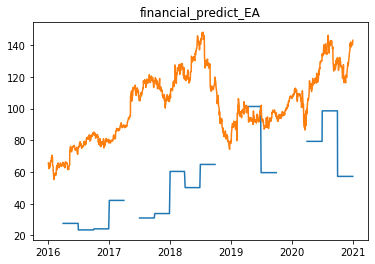

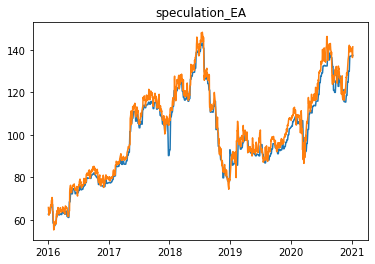

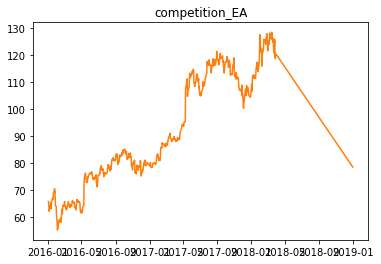

 25%|█████████████████████████████                                                                                       | 12/48 [11:01<32:47, 54.64s/it]

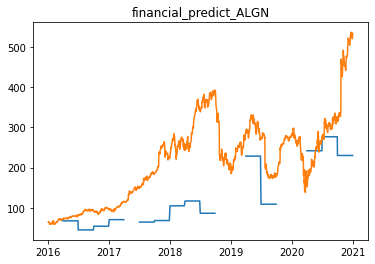

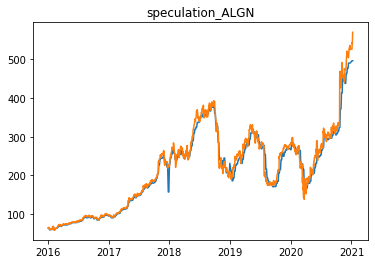

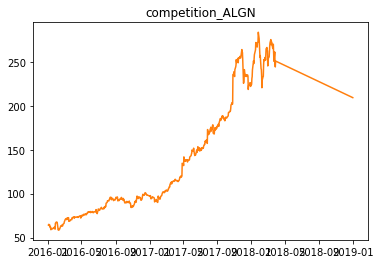

 27%|███████████████████████████████▍                                                                                    | 13/48 [11:55<31:54, 54.69s/it]

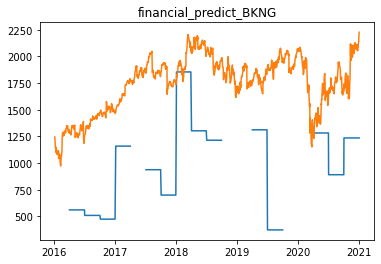

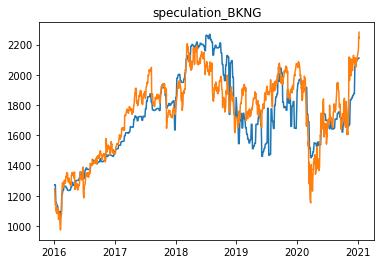

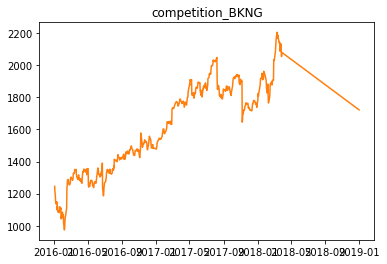

 29%|█████████████████████████████████▊                                                                                  | 14/48 [12:49<30:51, 54.46s/it]

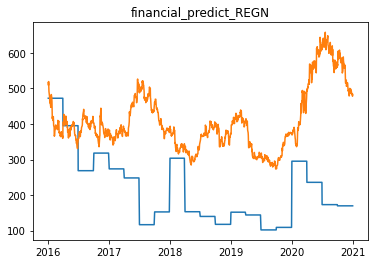

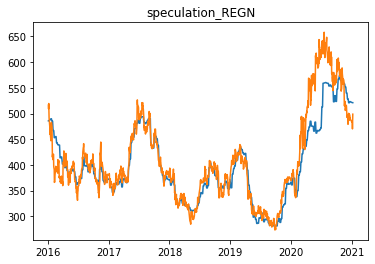

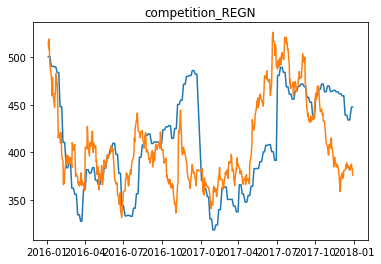

 31%|████████████████████████████████████▎                                                                               | 15/48 [13:44<29:56, 54.45s/it]

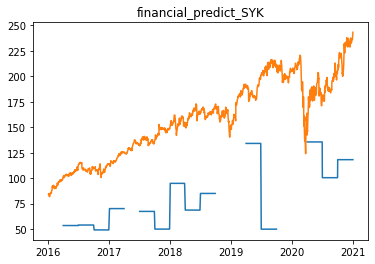

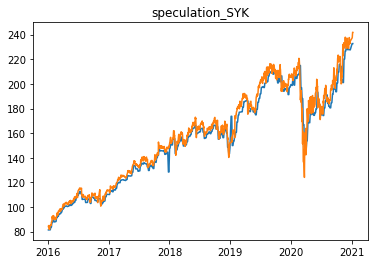

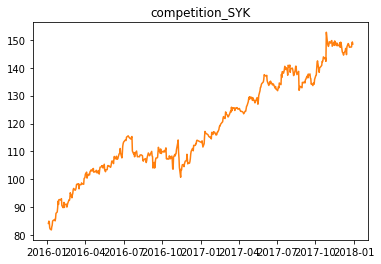

 33%|██████████████████████████████████████▋                                                                             | 16/48 [14:40<29:16, 54.90s/it]

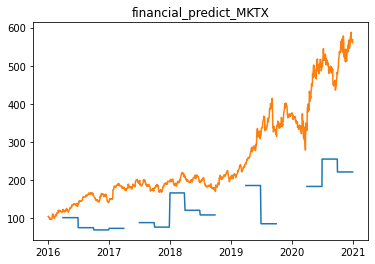

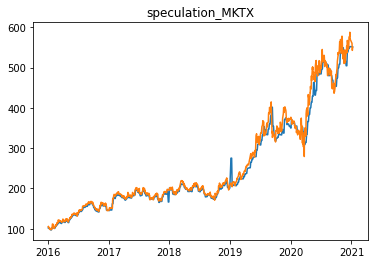

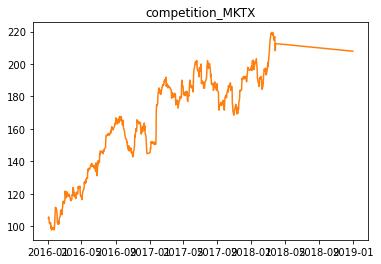

 35%|█████████████████████████████████████████                                                                           | 17/48 [15:35<28:25, 55.02s/it]

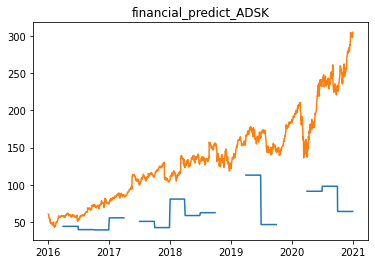

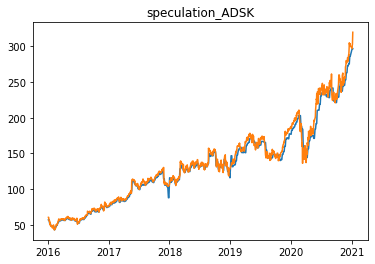

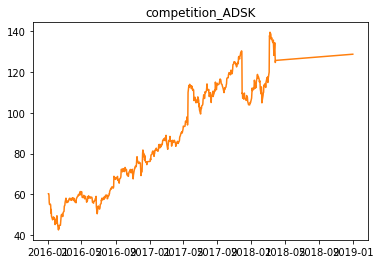

 38%|███████████████████████████████████████████▌                                                                        | 18/48 [16:30<27:30, 55.01s/it]

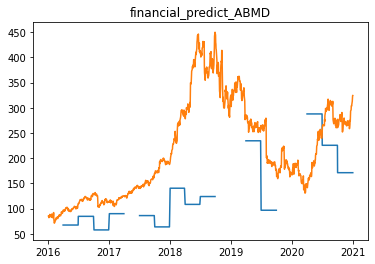

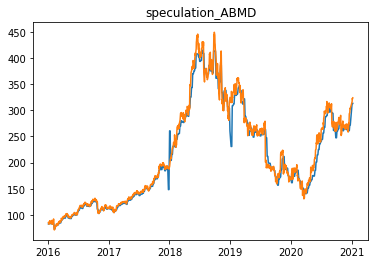

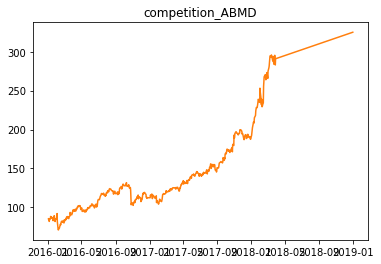

 40%|█████████████████████████████████████████████▉                                                                      | 19/48 [17:24<26:27, 54.73s/it]

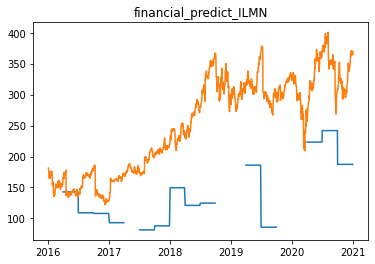

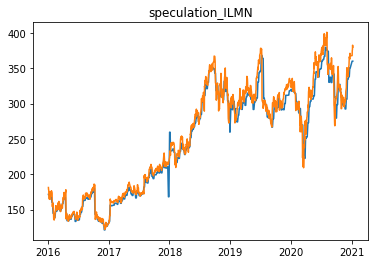

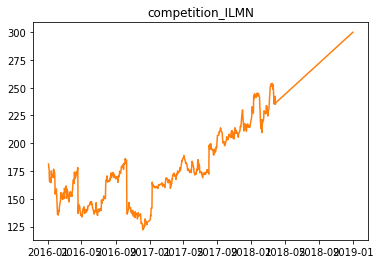

 42%|████████████████████████████████████████████████▎                                                                   | 20/48 [18:18<25:25, 54.47s/it]

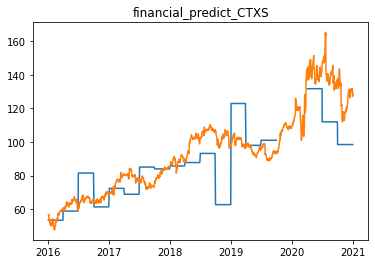

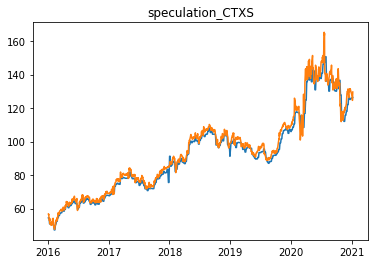

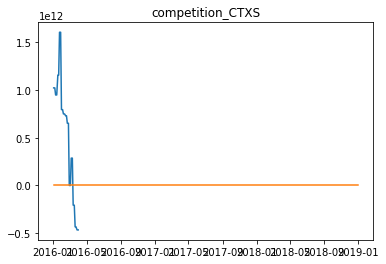

 44%|██████████████████████████████████████████████████▊                                                                 | 21/48 [19:14<24:46, 55.04s/it]

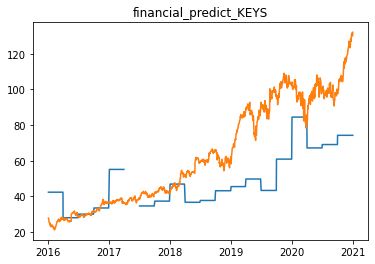

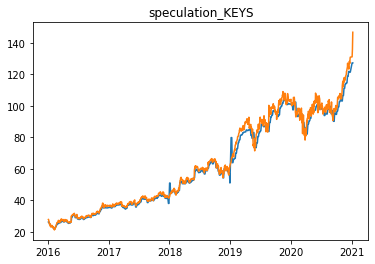

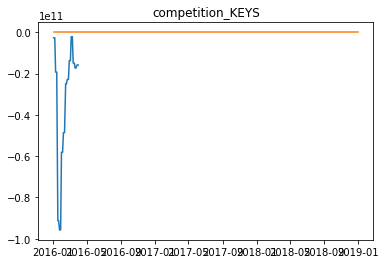

 46%|█████████████████████████████████████████████████████▏                                                              | 22/48 [20:10<23:58, 55.32s/it]

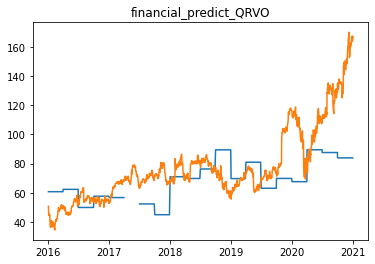

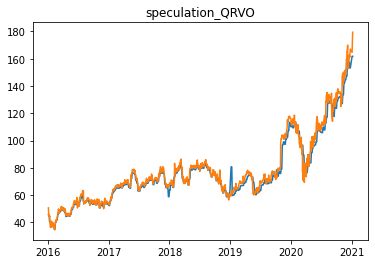

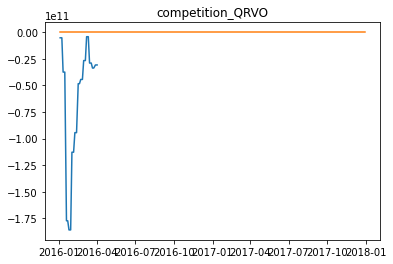

 48%|███████████████████████████████████████████████████████▌                                                            | 23/48 [21:06<23:02, 55.32s/it]

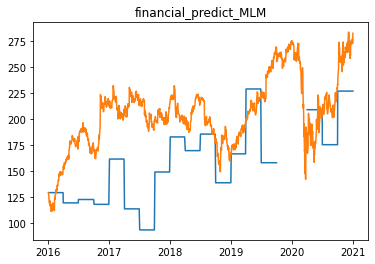

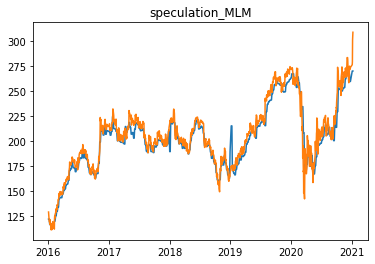

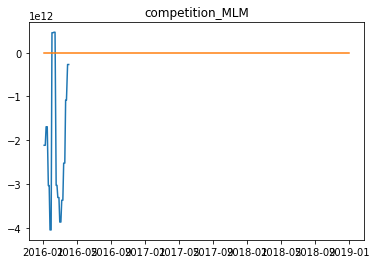

 50%|██████████████████████████████████████████████████████████                                                          | 24/48 [22:00<22:04, 55.19s/it]

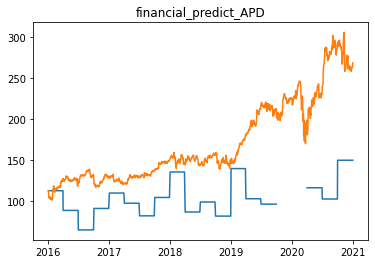

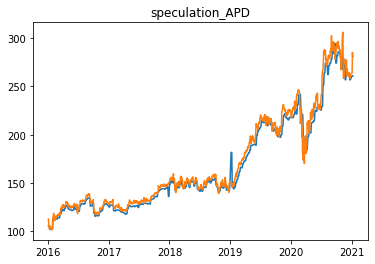

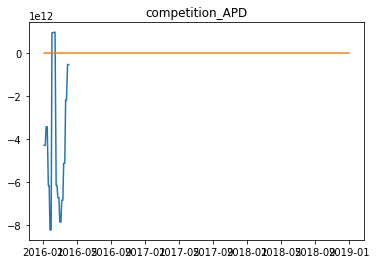

 52%|████████████████████████████████████████████████████████████▍                                                       | 25/48 [22:59<21:34, 56.28s/it]

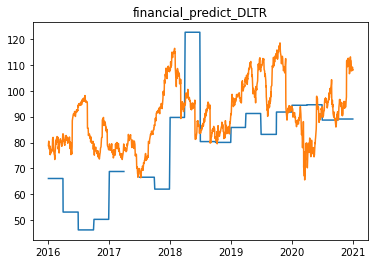

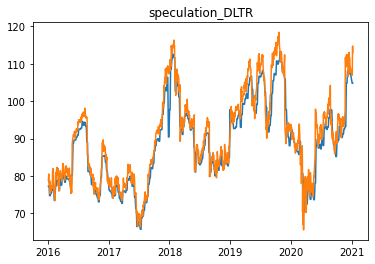

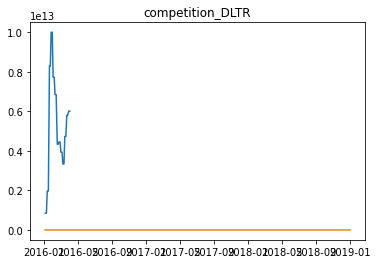

 54%|██████████████████████████████████████████████████████████████▊                                                     | 26/48 [23:54<20:29, 55.87s/it]

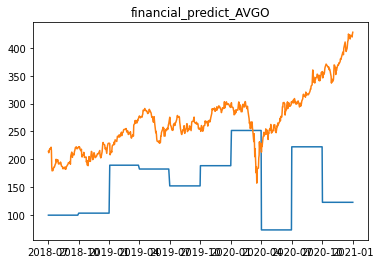

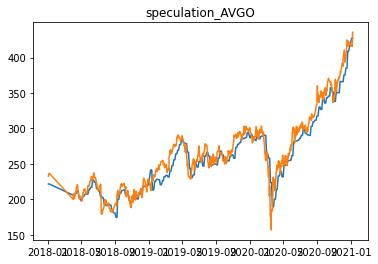

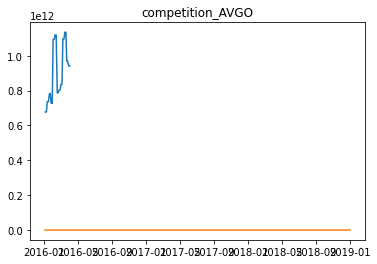

 56%|█████████████████████████████████████████████████████████████████▎                                                  | 27/48 [24:49<19:24, 55.44s/it]

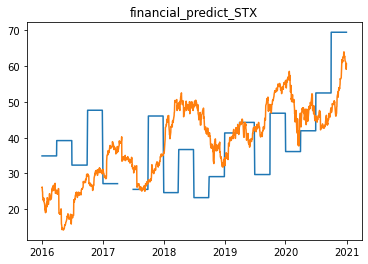

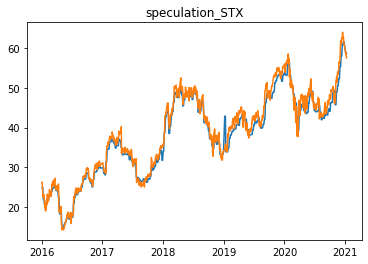

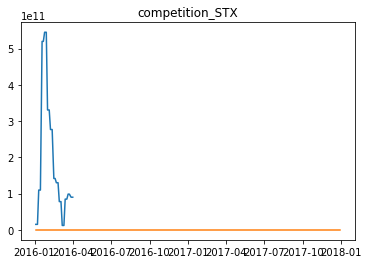

 58%|███████████████████████████████████████████████████████████████████▋                                                | 28/48 [25:43<18:21, 55.07s/it]

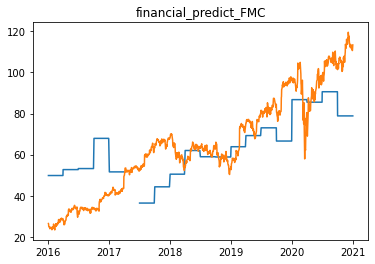

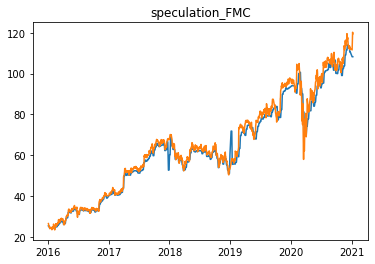

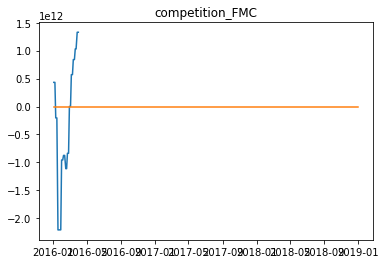

 60%|██████████████████████████████████████████████████████████████████████                                              | 29/48 [26:37<17:24, 54.96s/it]

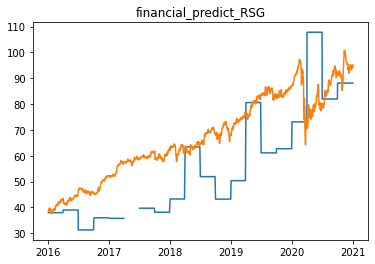

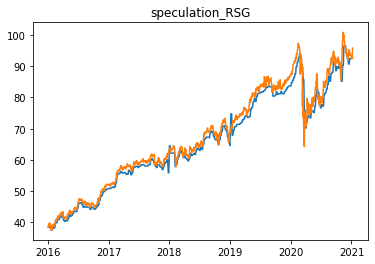

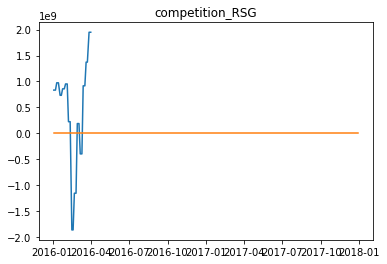

 62%|████████████████████████████████████████████████████████████████████████▌                                           | 30/48 [27:31<16:24, 54.68s/it]

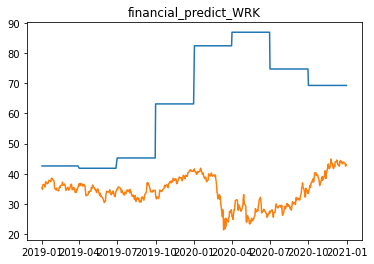

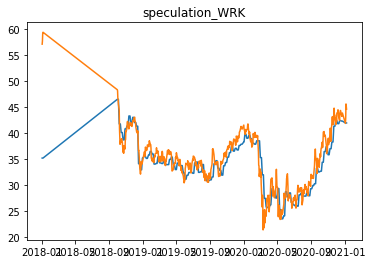

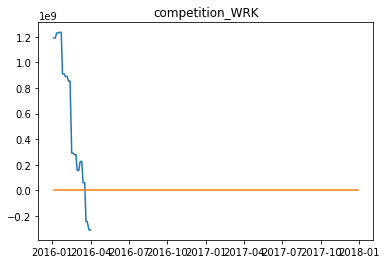

 65%|██████████████████████████████████████████████████████████████████████████▉                                         | 31/48 [28:27<15:33, 54.92s/it]

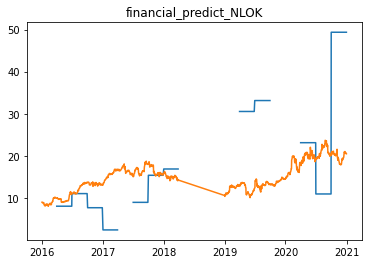

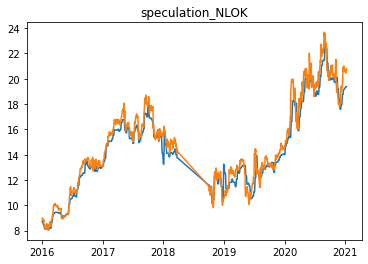

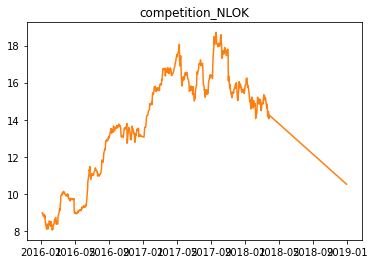

 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 32/48 [29:21<14:35, 54.73s/it]

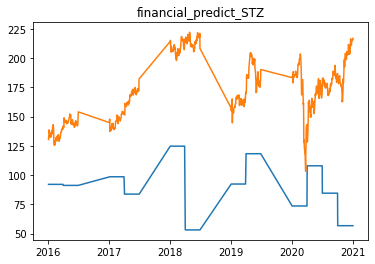

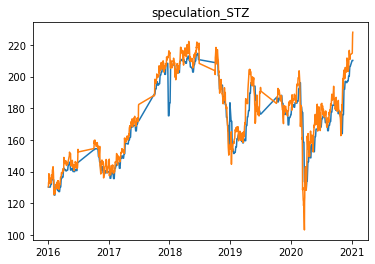

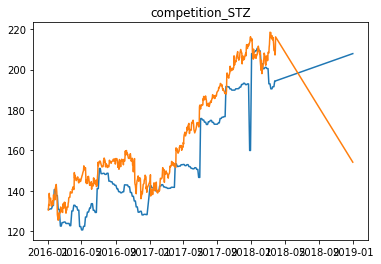

 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 33/48 [30:16<13:40, 54.67s/it]

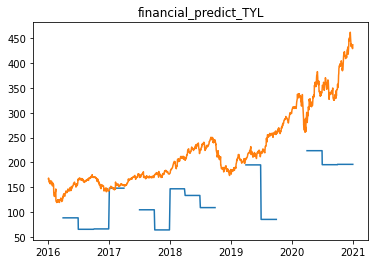

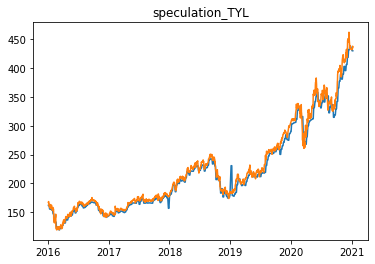

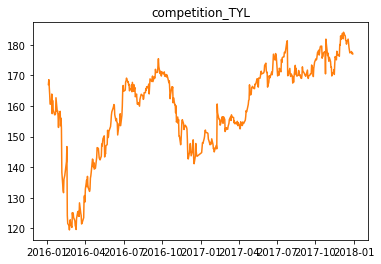

 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 34/48 [31:10<12:42, 54.48s/it]

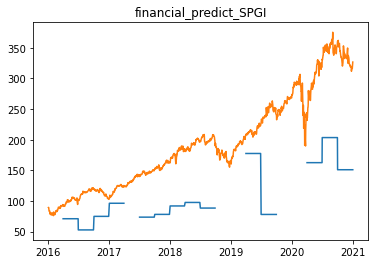

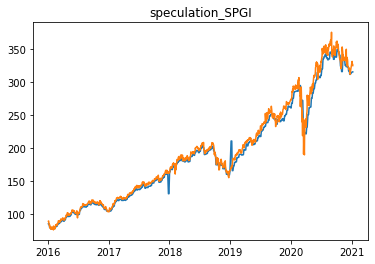

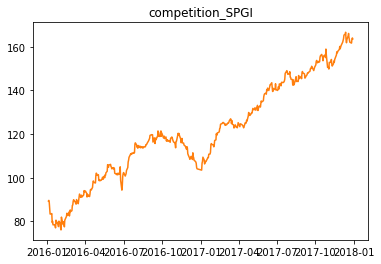

 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 35/48 [32:04<11:46, 54.32s/it]

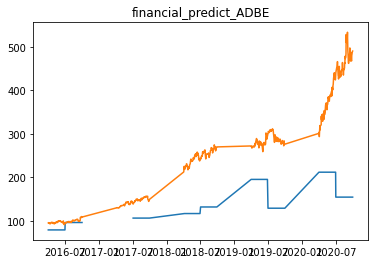

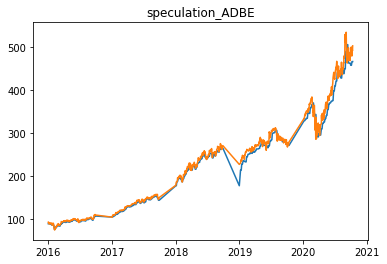

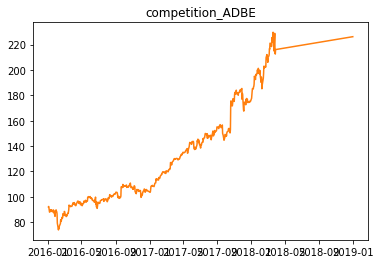

 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 36/48 [32:59<10:55, 54.61s/it]

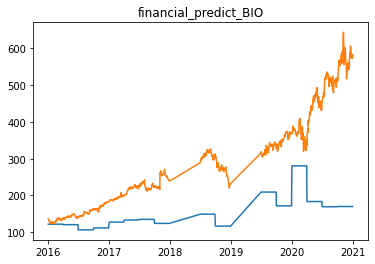

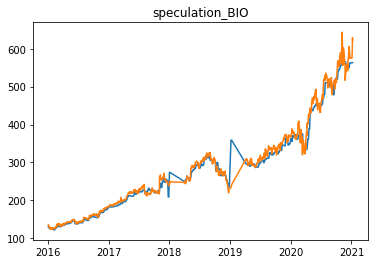

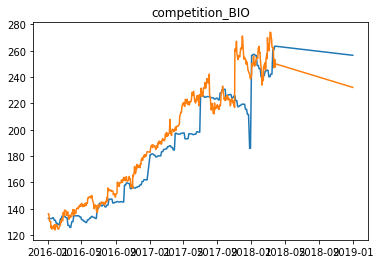

 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 37/48 [33:54<10:01, 54.64s/it]

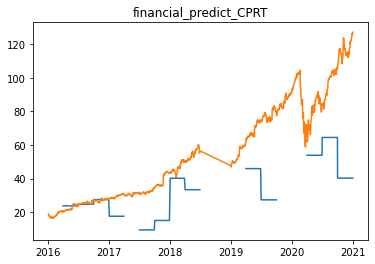

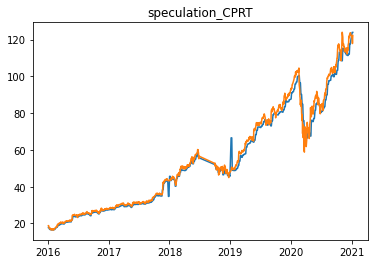

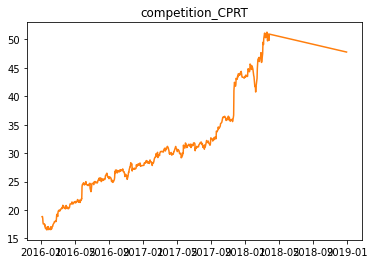

 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 38/48 [34:48<09:05, 54.56s/it]

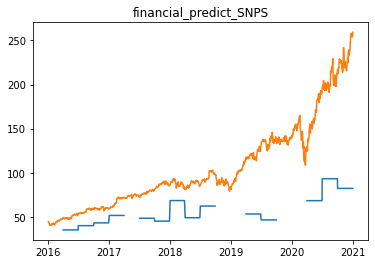

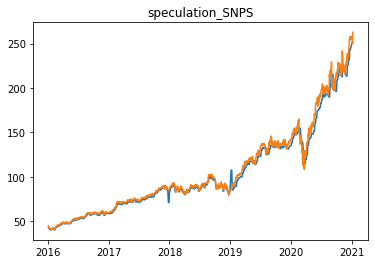

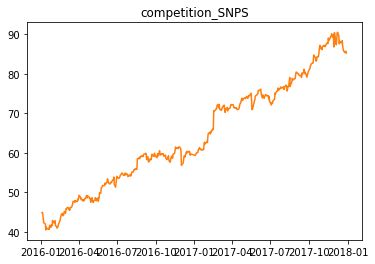

 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 39/48 [35:46<08:19, 55.47s/it]

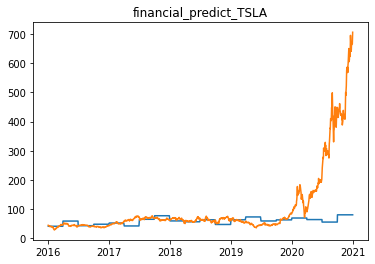

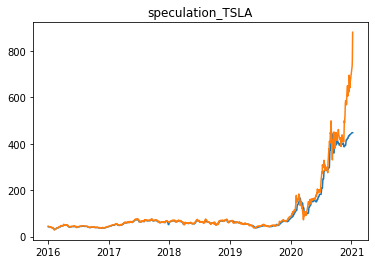

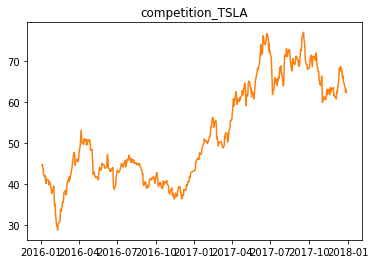

 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 40/48 [36:43<07:28, 56.07s/it]

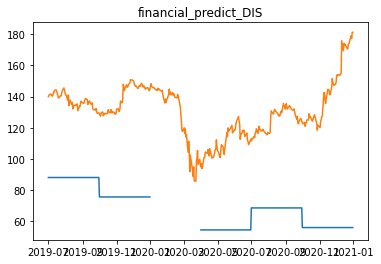

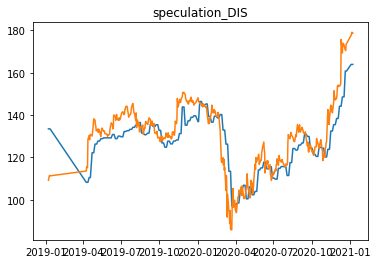

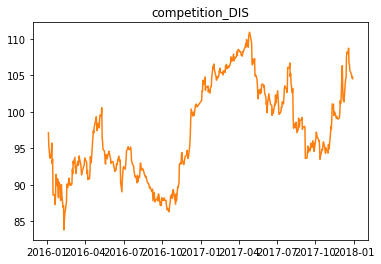

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 41/48 [37:38<06:30, 55.73s/it]

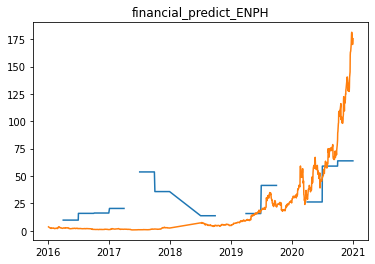

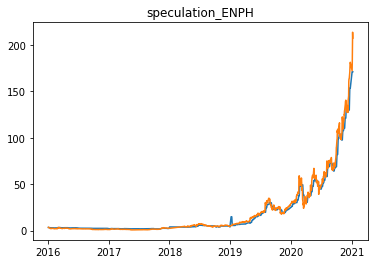

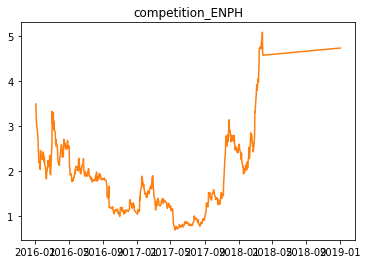

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 42/48 [38:33<05:32, 55.36s/it]

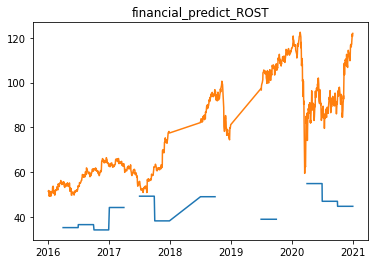

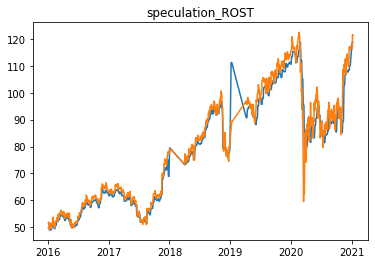

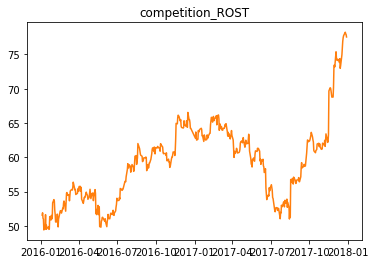

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 43/48 [39:27<04:34, 54.93s/it]

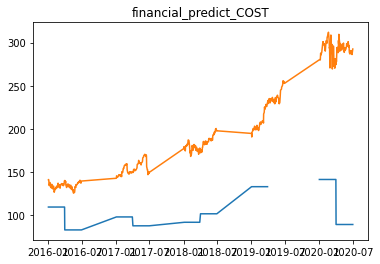

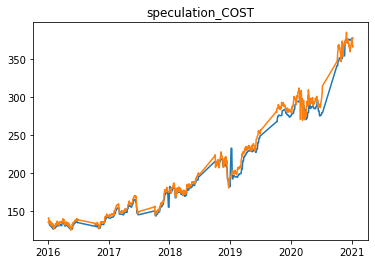

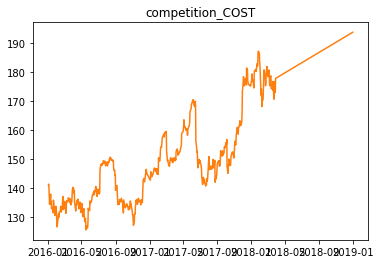

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 44/48 [40:21<03:39, 54.84s/it]

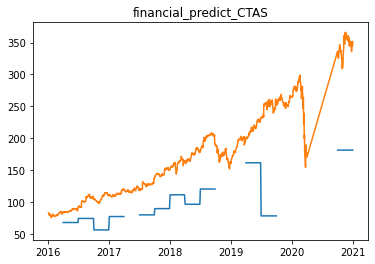

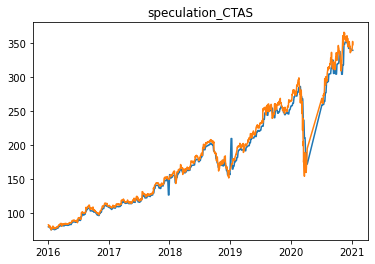

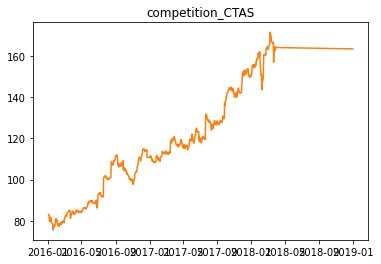

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 45/48 [41:18<02:45, 55.31s/it]

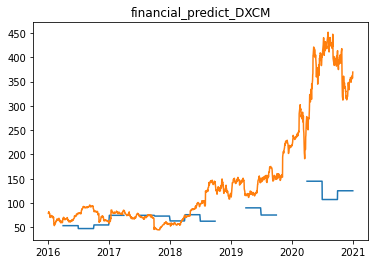

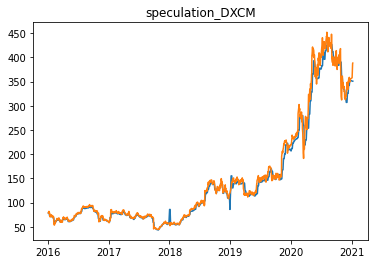

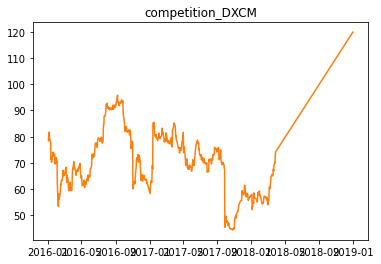

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 46/48 [42:12<01:50, 55.04s/it]

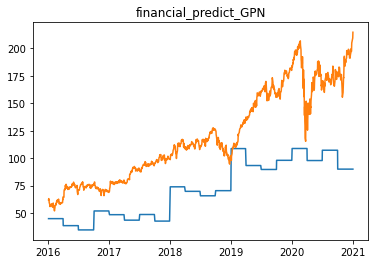

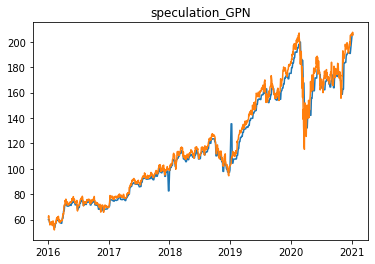

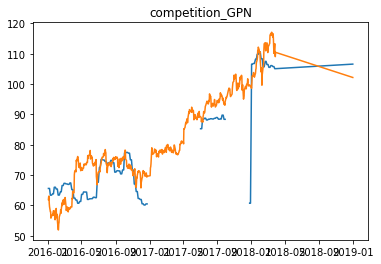

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 47/48 [43:06<00:54, 54.79s/it]

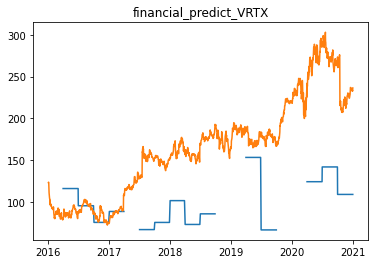

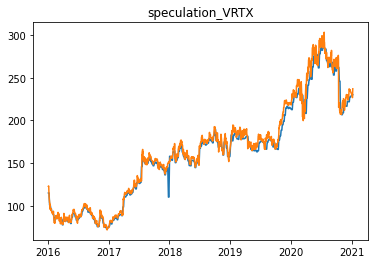

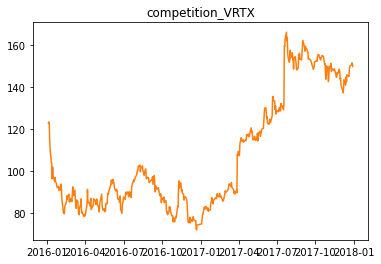

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [44:02<00:00, 55.06s/it]


In [48]:
suss = a.groupby(["strat","ticker"]).mean().reset_index().sort_values("mape",ascending=False).head(50)
for ticker in tqdm(suss["ticker"].unique()):
    for strat in [fp,spec,comp]:
        sim = strat.create_sim()
        sim["year"] = [x.year for x in sim["date"]]
        sim["quarter"] = [x.quarter for x in sim["date"]]
        sim["week"] = [x.week for x in sim["date"]]
        ticker_example = sim[sim["ticker"]==ticker].groupby("date").mean().reset_index()
        ticker_example.sort_values("date",inplace=True)
        plt.plot(ticker_example["date"],ticker_example["prediction"])
        plt.plot(ticker_example["date"],ticker_example["adjclose"])
        plt.title(f'{strat.name}_{ticker}')
        plt.show()